In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
df = pd.read_csv('people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head(10)

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
5,5,1,3.0,999.61,0,21.0,Homemaker,1.001654e+07,1.0
6,6,1,3.0,999.45,0,21.0,Homemaker,9.980108e+06,NaN
7,7,1,2.0,201589.78,1,32.0,Doctor,1.022668e+07,1.0
8,8,1,1.0,12912.69,1,9.0,Marketing,1.017361e+07,1.0
9,9,1,9.0,132369.86,1,100.0,Artist,1.018443e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6000 non-null   int64  
 1   was_married  6000 non-null   int64  
 2   childrens    6000 non-null   float64
 3   salary       6000 non-null   float64
 4   sex          6000 non-null   int64  
 5   age          6000 non-null   float64
 6   profession   6000 non-null   object 
 7   home_cost    6000 non-null   float64
 8   drive_info   3230 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 468.8+ KB


Численные признаки:
- id
- childrens
- salary
- age
- home_cost

Категориальные признаки:
- profession

Бинарные признаки:
- was_married
- sex
- drive_info

Нормальное распределение имеют признаки:
- home_cost
- age (если рассматривать промежуток до 60 лет, то похоже на нормальное)

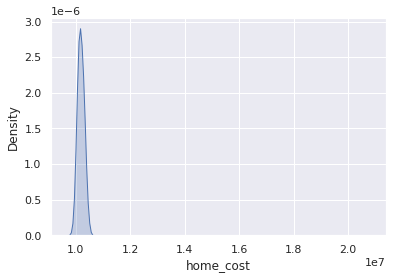

In [5]:
# Home_cost, но пока видно, что тут есть выбросы, построим тот же график, когда удалим выбросы
snsplot = sns.kdeplot(df['home_cost'], shade=True)
fig = snsplot.get_figure()

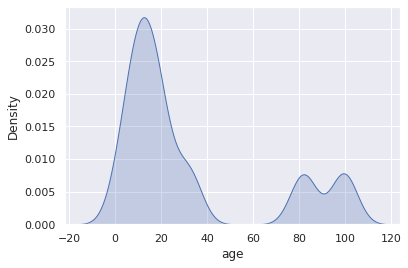

In [6]:
# Age
snsplot = sns.kdeplot(df['age'], shade=True)
fig = snsplot.get_figure()

Бессмысленные признаки:
- id
- drive_info


# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

В данных есть дубли, 500 строк из 6000:

In [7]:
df.loc[df.duplicated(subset=['was_married','childrens', 'salary', 'sex', 'age', 'profession', 'home_cost', 'drive_info'])]

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
5500,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
5501,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
5502,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
5503,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
5504,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
...,...,...,...,...,...,...,...,...,...
5995,495,1,0.0,37023.38,1,3.0,Executive,1.007038e+07,1.0
5996,496,1,3.0,999.66,0,20.0,Homemaker,1.009348e+07,1.0
5997,497,1,0.0,2042.76,0,17.0,Healthcare,1.016696e+07,0.0
5998,498,0,1.0,186560.45,0,10.0,Lawyer,1.025544e+07,NaN


Удалим дублированные данные

In [8]:
df = df.drop_duplicates(subset=['was_married','childrens', 'salary', 'sex', 'age', 'profession', 'home_cost', 'drive_info'])
df

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
...,...,...,...,...,...,...,...,...,...
5495,5495,1,1.0,12676.77,1,9.0,Marketing,1.027045e+07,0.0
5496,5496,1,6.0,215570.69,1,13.0,Entertainment,1.032767e+07,1.0
5497,5497,1,0.0,34734.29,1,3.0,Executive,1.010075e+07,NaN
5498,5498,1,1.0,12667.06,1,9.0,Marketing,1.011321e+07,1.0


Теперь размер нашего датафрейма 5500 * 9

В данных есть пропуски:

2524 пропуска в признаке drive_info

In [9]:
df.isnull().sum()

id                0
was_married       0
childrens         0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2524
dtype: int64

Наверно, лучше будет заполнить пропуски рандомным значением 0 или 1

In [10]:
from random import randint
a = randint(0, 1)

df = df.fillna(a)
print(df)

        id  was_married  childrens  ...     profession     home_cost  drive_info
0        0            1        4.0  ...       Engineer  1.003674e+07         1.0
1        1            1        2.0  ...         Doctor  1.014051e+07         0.0
2        2            1        6.0  ...  Entertainment  1.043318e+07         1.0
3        3            0        1.0  ...         Lawyer  1.004299e+07         1.0
4        4            1        9.0  ...         Artist  1.021908e+07         1.0
...    ...          ...        ...  ...            ...           ...         ...
5495  5495            1        1.0  ...      Marketing  1.027045e+07         0.0
5496  5496            1        6.0  ...  Entertainment  1.032767e+07         1.0
5497  5497            1        0.0  ...      Executive  1.010075e+07         1.0
5498  5498            1        1.0  ...      Marketing  1.011321e+07         1.0
5499  5499            0        2.0  ...         Doctor  1.022512e+07         1.0

[5500 rows x 9 columns]


(Но дальше мы все равно удалим этот признак, так что можно было не заполнять)

Удалим бессмысленные признаки:
- id
- drive_info

In [11]:
df.drop('id', inplace=True, axis=1)
df.drop('drive_info', inplace=True, axis=1)

In [12]:
print(df)

      was_married  childrens     salary  sex   age     profession     home_cost
0               1        4.0   45032.40    1  82.0       Engineer  1.003674e+07
1               1        2.0  202004.64    1  32.0         Doctor  1.014051e+07
2               1        6.0  213158.75    1  14.0  Entertainment  1.043318e+07
3               0        1.0  185692.78    0  10.0         Lawyer  1.004299e+07
4               1        9.0  132067.32    1  99.0         Artist  1.021908e+07
...           ...        ...        ...  ...   ...            ...           ...
5495            1        1.0   12676.77    1   9.0      Marketing  1.027045e+07
5496            1        6.0  215570.69    1  13.0  Entertainment  1.032767e+07
5497            1        0.0   34734.29    1   3.0      Executive  1.010075e+07
5498            1        1.0   12667.06    1   9.0      Marketing  1.011321e+07
5499            0        2.0  201840.19    1  33.0         Doctor  1.022512e+07

[5500 rows x 7 columns]


Теперь размер датафрейма стал 5500 * 7

Удалим выбросы по признаку home_cost:

Визуализируем выбросы с помощью boxplot

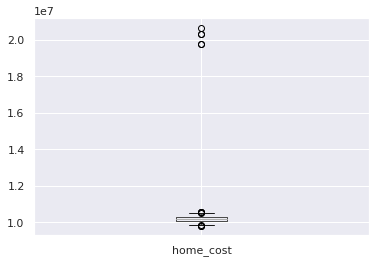

In [13]:
numeric_col = ['home_cost']
df.boxplot(numeric_col)

In [14]:
#Найдем выбросы и удалим из датафрейма
low_kv = df['home_cost'] > 1.1e7
high_kv = df['home_cost'] < 0.985e7
df[low_kv | high_kv].index

Int64Index([173, 1140, 1779, 2070, 3307, 3380, 4014, 4365, 4727], dtype='int64')

In [15]:
df = df.drop(df[low_kv | high_kv].index, axis=0)

In [16]:
df

,was_married,childrens,salary,sex,age,profession,home_cost
0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07
1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07
2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07
3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07
4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07
...,...,...,...,...,...,...,...
5495,1,1.0,12676.77,1,9.0,Marketing,1.027045e+07
5496,1,6.0,215570.69,1,13.0,Entertainment,1.032767e+07
5497,1,0.0,34734.29,1,3.0,Executive,1.010075e+07
5498,1,1.0,12667.06,1,9.0,Marketing,1.011321e+07


Размер нашего датафрейма стал 5491*7. 

Выбросов было 9

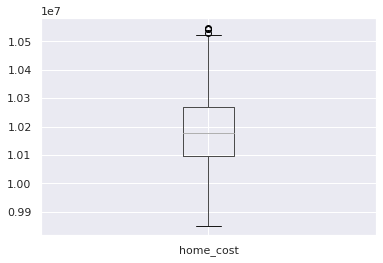

In [17]:
numeric_col = ['home_cost']
df.boxplot(numeric_col)

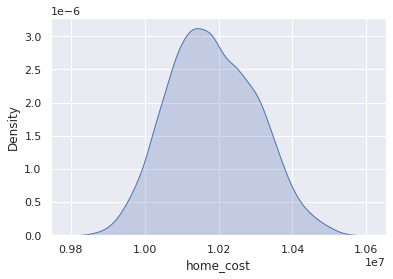

In [18]:
# Home_cost, после удаления выбросов - действительно, похоже на нормальное распределение
snsplot = sns.kdeplot(df['home_cost'], shade=True)
fig = snsplot.get_figure()

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



Матрица корреляций

In [19]:
df.corr()

,was_married,childrens,salary,sex,age,home_cost
was_married,1.000000,0.242873,-0.500144,0.338104,0.200798,-0.342455
childrens,0.242873,1.000000,0.393691,0.386080,0.742385,0.284430
salary,-0.500144,0.393691,1.000000,0.244657,0.075623,0.710077
sex,0.338104,0.386080,0.244657,1.000000,0.340387,0.179874
age,0.200798,0.742385,0.075623,0.340387,1.000000,0.054570
home_cost,-0.342455,0.284430,0.710077,0.179874,0.054570,1.000000


С помощью heatmap

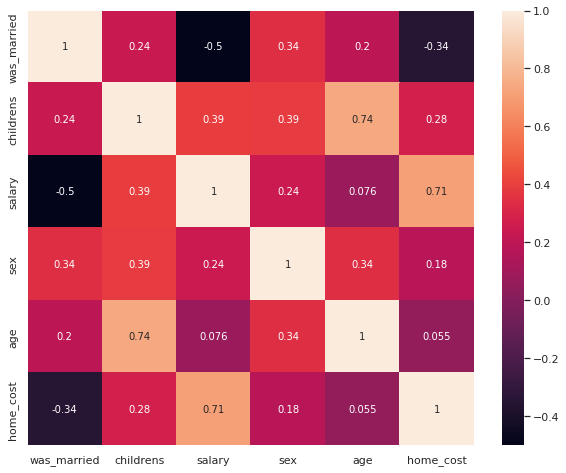

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

Самыми скореллированными признаками являются age и childrens, salary и home_cost

Еще стоит отметить, что небольшую антизависимость имеют признаки salary и was_married

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


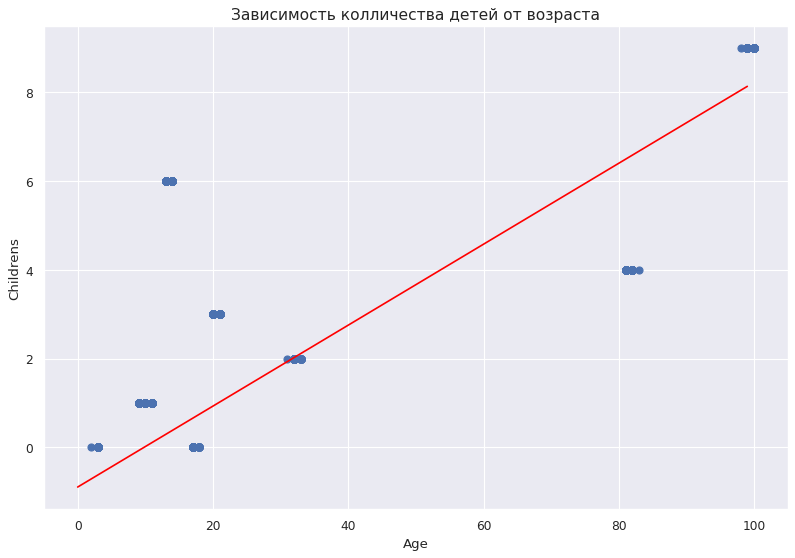

In [21]:
def plotting_corr_features():
    x = df['age']
    y = df['childrens']
    fig, ax = plt.subplots(figsize=(12,8), dpi= 80) 
    pd.DataFrame(np.array([x, y]).T).plot.scatter(0, 1, s=40, grid=True, ax=ax)
    plt.xlabel('Age')
    plt.ylabel('Childrens')
    plt.title('Зависимость колличества детей от возраста', fontsize=14)

    N = df['age'].max()
    mx = x.sum()/N
    my = y.sum()/N
    a2 = np.dot(x.T, x)/N
    a11 = np.dot(x.T, y)/N
    
    kk = (a11 - mx*my)/(a2 - mx**2)
    bb = my - kk*mx
    ff = np.array([kk*z+bb for z in range(int(N))])
    plt.plot(ff, c='red')
    plt.show()

plotting_corr_features()

Нарисовала еще прямую, чтобы показать, что признаки линейно зависимы

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

В нормировке нуждаются только численные признаки:
'childrens', 'salary', 'age', 'home_cost'

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn import preprocessing 

names = ['childrens', 'salary', 'age', 'home_cost'] 
ms = MinMaxScaler()
normal_data = df
normal_data[names] = ms.fit_transform(df[names])
normal_data[names]

print(normal_data)

      was_married  childrens    salary  sex       age     profession  home_cost
0               1   0.444444  0.203134    1  0.816327       Engineer   0.265805
1               1   0.222222  0.927245    1  0.306122         Doctor   0.414884
2               1   0.666667  0.978699    1  0.122449  Entertainment   0.835341
3               0   0.111111  0.851998    0  0.081633         Lawyer   0.274771
4               1   1.000000  0.604625    1  0.989796         Artist   0.527758
...           ...        ...       ...  ...       ...            ...        ...
5495            1   0.111111  0.053878    1  0.071429      Marketing   0.601553
5496            1   0.666667  0.989825    1  0.112245  Entertainment   0.683764
5497            1   0.000000  0.155629    1  0.010204      Executive   0.357761
5498            1   0.111111  0.053833    1  0.071429      Marketing   0.375654
5499            0   0.222222  0.926486    1  0.316327         Doctor   0.536439

[5491 rows x 7 columns]


Понравился MinMaxScaler, его и использовала

Теперь выведем наш датафрейм без таргет-колонки

In [23]:
features = ['childrens', 'salary', 'age', 'home_cost', 'was_married', 'sex']
print(normal_data[features])

      childrens    salary       age  home_cost  was_married  sex
0      0.444444  0.203134  0.816327   0.265805            1    1
1      0.222222  0.927245  0.306122   0.414884            1    1
2      0.666667  0.978699  0.122449   0.835341            1    1
3      0.111111  0.851998  0.081633   0.274771            0    0
4      1.000000  0.604625  0.989796   0.527758            1    1
...         ...       ...       ...        ...          ...  ...
5495   0.111111  0.053878  0.071429   0.601553            1    1
5496   0.666667  0.989825  0.112245   0.683764            1    1
5497   0.000000  0.155629  0.010204   0.357761            1    1
5498   0.111111  0.053833  0.071429   0.375654            1    1
5499   0.222222  0.926486  0.316327   0.536439            0    1

[5491 rows x 6 columns]


Выделим таргет фичу - профессию

In [24]:
target = df['profession']
target

0            Engineer
1              Doctor
2       Entertainment
3              Lawyer
4              Artist
            ...      
5495        Marketing
5496    Entertainment
5497        Executive
5498        Marketing
5499           Doctor
Name: profession, Length: 5491, dtype: object

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

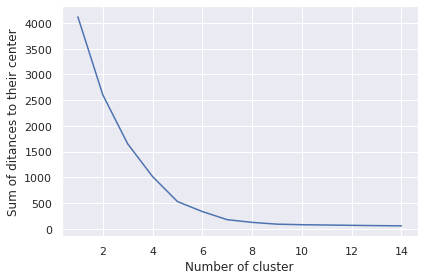

In [25]:
#Правило локтя
from sklearn.cluster import KMeans

s = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normal_data[features])
    s[k] = kmeans.inertia_ # Сумма расстояний до центров кластеров

plt.figure()
plt.plot(list(s.keys()), list(s.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of ditances to their center")
plt.tight_layout()
plt.show()

Пока неочевидно, какое число кластеров является оптимальным. Попробуем посмотреть на коэффициенты силуэта

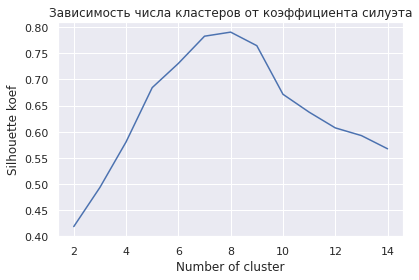

In [26]:
from sklearn.metrics import silhouette_samples

silhouette = []
X = normal_data[features].values

for i in range(2, 15):
    km = KMeans(n_clusters=i, max_iter=1000)
    y_km = km.fit_predict(X)    
    silhouette.append(np.mean(silhouette_samples(X, y_km, metric='euclidean')))

plt.plot(range(2, 15), silhouette)
plt.ylabel('Silhouette koef')
plt.xlabel("Number of cluster")
plt.title("Зависимость числа кластеров от коэффициента силуэта")
plt.tight_layout()
plt.show()

По графику видно, что оптимальное число кластеров в данном случае - 8

# Снизить разерность (6 баллов)
*  Снизить разерность (6 баллов)
Воспользуйтесь методом t-SNE () (или PCA, U-MAP)
* ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Воспользуюсь PCA, так как до этого с ним уже работала

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(normal_data[features])

In [28]:
var_rat = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(var_rat))

Explained variation per principal component: [0.42743181 0.30796203 0.16287103 0.06919979 0.01877488 0.01376047]


In [29]:
print(pca.singular_values_)

[41.96243908 35.61852138 25.90294946 16.8841692   8.7945956   7.52911411]


In [30]:
comp = pca.n_components_
comp

6

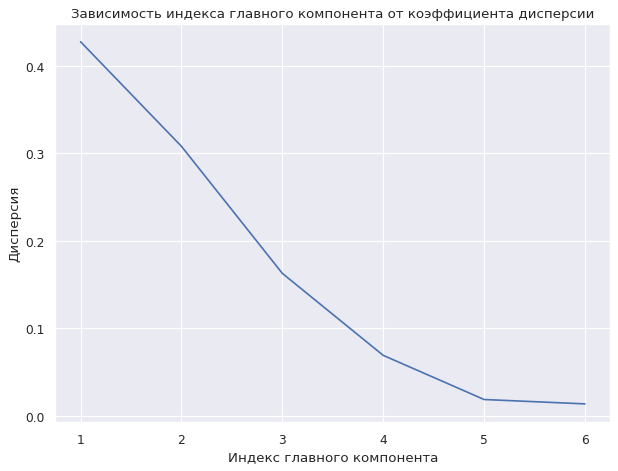

In [31]:
fig, ax = plt.subplots(figsize=(8,6), dpi= 80) 
plt.xlabel('Индекс главного компонента')
plt.ylabel("Дисперсия")
plt.title("Зависимость индекса главного компонента от коэффициента дисперсии")
plt.tight_layout()
plt.plot(range(1, comp + 1), pca.explained_variance_ratio_)
plt.show()

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normal_data[features])

# Нарисовать полученные кластеры (10 баллов)

In [39]:
#Обучим KMeans с 8 кластерами
km = KMeans(n_clusters=8,
            max_iter=1000)

y_km = km.fit_predict(normal_data[features].values)

In [40]:
labels = normal_data['profession'].unique()
labels

array(['Engineer', 'Doctor', 'Entertainment', 'Lawyer', 'Artist',
       'Homemaker', 'Marketing', 'Healthcare', 'Executive'], dtype=object)

In [41]:
normal_data['profession'].value_counts()

Lawyer           611
Entertainment    611
Doctor           611
Artist           611
Healthcare       610
Engineer         610
Executive        609
Homemaker        609
Marketing        609
Name: profession, dtype: int64

Видим, что уникальных значений профессий 9. А кластеров 8

Для начала построим для 8 кластеров, и посмотрим, насколько хорошо KMeans отделил их

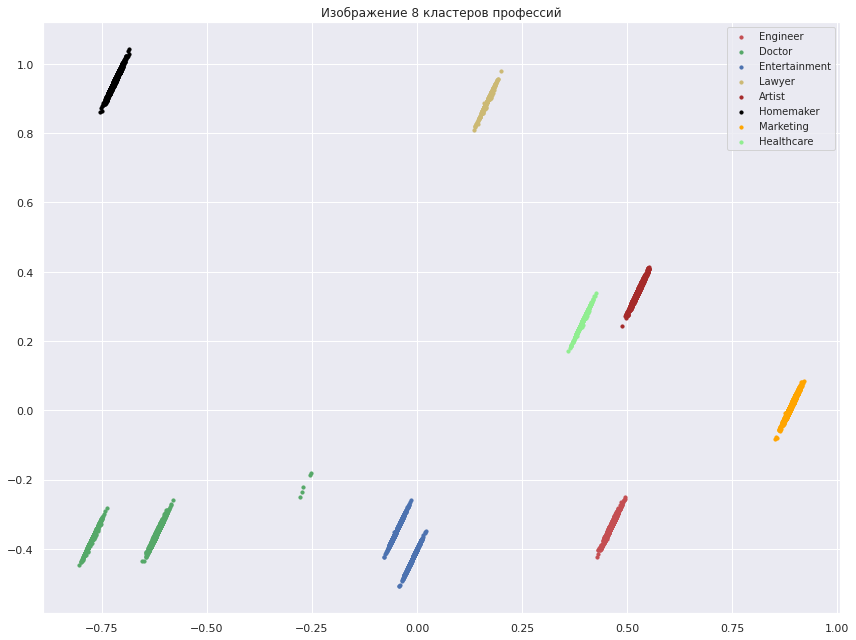

In [42]:
plt.figure(figsize=(12,9))

for i in range(8):
  colours = ['r', 'g', 'b', 'y', 'brown', 'black', 'orange', 'lightgreen']
  plt.scatter(X_pca[y_km == i, 0], X_pca[y_km == i, 1], c=colours[i], s=10, label=labels[i])
  
plt.legend(fontsize='medium')  
plt.title("Изображение 8 кластеров профессий")
plt.tight_layout()
plt.show()

Попробуем обучить KMeans на 9 кластерах

In [45]:
#Обучим KMeans с 9 кластерами
km = KMeans(n_clusters=9,
            max_iter=1000)

y_km = km.fit_predict(normal_data[features].values)

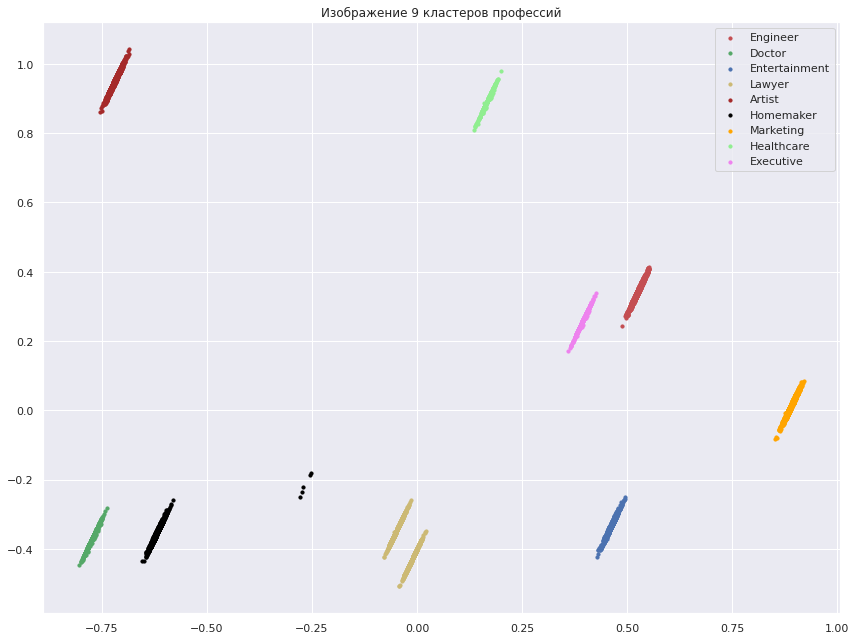

In [46]:
plt.figure(figsize=(12,9))

for i in range(9):
  colours = ['r', 'g', 'b', 'y', 'brown', 'black', 'orange', 'lightgreen', 'violet']
  plt.scatter(X_pca[y_km == i, 0], X_pca[y_km == i, 1], c=colours[i], s=10, label= labels[i])
  
plt.legend(fontsize='medium')  
plt.legend(labels)
plt.title("Изображение 9 кластеров профессий")
plt.tight_layout()
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**